* this part is about data cleaning for task 1 

* listing_id - unique identifier of the property listing
    * drop
* title - title of the property listing (e.g., "2 bed condo for sale in 35 gilstead")
    * drop
* address - address of the property (e.g., "124 punggol walk", "11 sengkang east avenue")
    * drop
* property_name - name of the property (e.g., "redhill rise", "klimt cairnhill")
    * provide information, but drop at the end; average price
* property_type - type of the property (e.g., "condo", "hdb 2 rooms", "landed")
    * aggregation, hdb 2/3/4 rooms -> hdb
* Z'tenure' - tenure of the property (e.g., "freehold", "99-year leasehold")
    * 1.aggregation, 99/999/freehold, /2.or convert to numeric, left tenure years; assign tenure values of each property type to na value; tenure may affect price, for example, decreases largely last 40 years
* Z'built_year' - year when the property was was built (e.g., 2014, 2021)
    * to numeric;make built_year interval data and replenish na values with same processing of tenure
* O'num_beds' - number of bedrooms (e.g., 1, 2, 3)
    * na -> 0
* O'num_baths' - number of bathrooms (e.g., 1, 2, 3)
    * na: assign values according to property_name and sqft; or according to num_beds
* S'size_sqft' - floor area in square feet (e.g., 807, 657, 1628)
    * box plot visualization for outlier points processing, large -> /1000, small -> *100 or 0 for deletion; sqft price for data assigning according to grouping by attribute
* floor_level - information about the floor level of the property (e.g., "high", "low")
    * drop
* furnishing - information whether the property is furnished (e.g., "fully", "partial")
    * drop(70% unspecified) or one-hot as category type
* available_unit_types - list of all types of units available in the property complex (e.g., "studio, 3, 4, 5 br")
    * maybe drop
* total_num_units - total number of units in the property complex (e.g., 115, 200)
    * maybe drop
* property_details_url - URL linking to more information about the property complex
    * maybe drop or provide information
* J'lat' - latitude of property (e.g., 1.328805)
* J'lng' - longitude of property (e.g., 103.74502)
    * lat & lng for aulixiary data calculation; assign value to extreme lat & lng according to property_name
* elevation - elevation of the property in meters (e.g., 10)
    * drop
* J'subszone' - subzone of block containing the flat in meter (e.g., "blangah rise", "marymount")
    * keep one, or planning area; knn to assign subzone to na
* planning_area - planning area of block containing the flat (e.g., "woodlands", "bukit merah")
    * keep one, or subzone
* S'price' - sales price in SGD
    * outliers processing
    
    
model:
kernel ridge,
xgboost,
random forest(regression/ classification)


借助99.co所有成交价格上下限，做decision tree分类问题

新加坡地产管理：经纬度可以返回具体的planning area

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
data_train = pd.read_csv('./data/train.csv')

## Preprocess size_sqft attribute

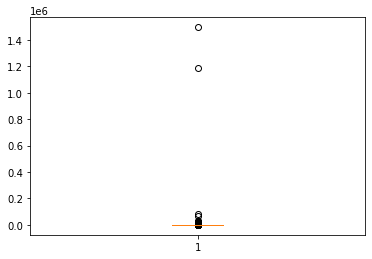

In [3]:
plt.boxplot(data_train['size_sqft'])

plt.show()

In [4]:
data_train[data_train['size_sqft']>1e6]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
2701,160293,3 bed condo for sale in jlb residences,169 jalan loyang besar,jlb residences,condo,946-year leasehold,2008.0,3.0,2.0,1185000,...,unfurnished,3 br,36.0,https://www.99.co/singapore/condos-apartments/...,1.379105,103.960613,0,pasir ris park,pasir ris,1244200.0
18446,771950,4 bed condo for sale in avenue south residence,1 silat avenue,avenue south residence,condo,99-year leasehold,2023.0,4.0,4.0,1496000,...,unspecified,"studio, 1, 2, 3, 4 br",1074.0,https://www.99.co/singapore/condos-apartments/...,1.304855,103.773776,0,dover,queenstown,3040800.0


* According to box plot, there are two outlier points with size_sqft bigger than 1e6 and according to size_sqft value of other similar condos, size_sqft value should be less than 1e4. For these two points, we divide them by 1000.
* 

In [3]:
data_train["size_sqft"] = np.where(data_train["size_sqft"] > 1e6, data_train["size_sqft"]/1000, data_train["size_sqft"])


In [6]:
data_train[data_train['size_sqft']>1e6]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price


* After processing two extreme outliers, we show box plot again and find that there is still some extreme values and here, we selected data records with size_sqft larger than 20000. With showing description under each property, it can be concluded that two points with size_sqft larger than 60000 are outliers as other points with same property_name have smaller sqft range. If we divide sqft in these two points by 10, we can find that data description grouped by these two property_name are more normal.

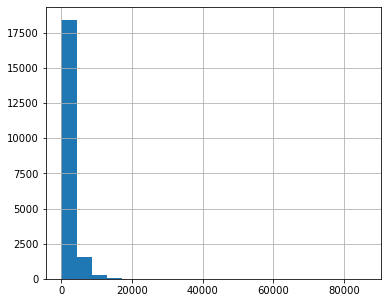

In [7]:
data_train['size_sqft'].hist(bins=20, figsize=(6,5))
plt.show()



In [8]:
data_train[data_train['size_sqft']>15000]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
1649,149017,10 bed house for sale in braddell heights estate,cotswold close,braddell heights estate,bungalow,freehold,2011.0,10.0,10.0,30000.0,...,unspecified,"3, 4, 5, 6, 7, 8, 10 br",NaN,https://www.99.co/singapore/houses/braddell-he...,1.346020,103.867198,0,lorong chuan,serangoon,29400000.0
4287,753969,6 bed house for sale in bedok park,limau garden,bedok park,semi-detached house,freehold,1970.0,6.0,7.0,86080.0,...,unspecified,"5, 6, 10 br",NaN,https://www.99.co/singapore/houses/bedok-park-...,1.306408,103.932790,0,siglap,bedok,6279000.0
5317,280453,6 bed house for sale in windsor park,windsor park road,windsor park,bungalow,freehold,NaN,6.0,7.0,18000.0,...,unspecified,"1, 3, 4, 5, 6, 8 br",NaN,https://www.99.co/singapore/houses/windsor-par...,1.356618,103.821178,0,upper thomson,bishan,42000000.0
5771,878816,6 bed house for sale in braddell heights estate,cotswold close,braddell heights estate,bungalow,freehold,2011.0,6.0,7.0,18000.0,...,unspecified,"3, 4, 5, 6, 7, 8, 10 br",NaN,https://www.99.co/singapore/houses/braddell-he...,1.346020,103.867198,0,lorong chuan,serangoon,21000000.0
6495,887337,5 bed house for sale in ladyhill park,lady hill road,ladyhill park,bungalow,freehold,1990.0,5.0,5.0,20000.0,...,unfurnished,"3, 5, 6, 8 br",17.0,https://www.99.co/singapore/houses/ladyhill-pa...,1.311458,103.825221,0,nassim,tanglin,58590000.0
9319,590307,6 bed house for sale in rosie view,mount rosie road,rosie view,Bungalow,NaN,NaN,6.0,9.0,16000.0,...,unspecified,"5, 6 br",NaN,https://www.99.co/singapore/houses/rosie-view-...,1.322600,103.835738,0,malcolm,novena,28062300.0
10719,359647,6 bed house for sale in ocean 8,ocean drive,ocean 8,bungalow,99-year leasehold,2010.0,6.0,5.0,16000.0,...,unspecified,"4, 5, 6 br",8.0,https://www.99.co/singapore/houses/ocean-8-dev...,1.246413,103.842371,0,sentosa,southern islands,21000000.0
11598,802198,7 bed house for sale in caldecott hill estate,andrew road,caldecott hill estate,bungalow,freehold,1985.0,7.0,5.0,20000.0,...,fully,"3, 4, 5, 6, 7, 8 br",107.0,https://www.99.co/singapore/houses/caldecott-h...,1.339271,103.832160,0,mount pleasant,novena,41893200.0
13461,571444,6 bed house for sale in westville,westwood terrace,westville,terraced house,99-year leasehold,1997.0,6.0,5.0,25003.0,...,unspecified,"2, 4, 5, 6 br",339.0,https://www.99.co/singapore/houses/westville-d...,1.352481,103.699082,0,yunnan,jurong west,2625000.0
13589,476002,8 bed house for sale in ladyhill park,fernhill road,ladyhill park,bungalow,freehold,1990.0,8.0,9.0,27500.0,...,unspecified,"3, 5, 6, 8 br",17.0,https://www.99.co/singapore/houses/ladyhill-pa...,1.311925,103.824001,0,nassim,tanglin,58800000.0


In [9]:
property_name = data_train[data_train['size_sqft']>15000]['property_name']
property_name

1649     braddell heights estate
4287                  bedok park
5317                windsor park
5771     braddell heights estate
6495               ladyhill park
9319                  rosie view
10719                    ocean 8
11598      caldecott hill estate
13461                  westville
13589              ladyhill park
15637            swiss club park
19091          queen astrid park
Name: property_name, dtype: object

In [10]:
for i in property_name:
    print(i, data_train[(data_train['size_sqft']>15000) & (data_train['property_name'] == i)]['size_sqft'])
    print(data_train[data_train['property_name']==i]['size_sqft'].describe())

braddell heights estate 1649    30000.0
Name: size_sqft, dtype: float64
count       22.000000
mean      7827.181818
std       5676.490152
min       4500.000000
25%       5398.500000
50%       6150.000000
75%       7700.000000
max      30000.000000
Name: size_sqft, dtype: float64
bedok park 4287    86080.0
Name: size_sqft, dtype: float64
count       16.000000
mean     11978.250000
std      19854.422354
min       3200.000000
25%       7210.250000
50%       8000.000000
75%       8012.000000
max      86080.000000
Name: size_sqft, dtype: float64
windsor park Series([], Name: size_sqft, dtype: float64)
count        3.0
mean     10500.0
std       6500.0
min       6500.0
25%       6750.0
50%       7000.0
75%      12500.0
max      18000.0
Name: size_sqft, dtype: float64
braddell heights estate 1649    30000.0
Name: size_sqft, dtype: float64
count       22.000000
mean      7827.181818
std       5676.490152
min       4500.000000
25%       5398.500000
50%       6150.000000
75%       7700.000000
ma

In [11]:
data_train["size_sqft"] = np.where(data_train["size_sqft"] > 60000, data_train["size_sqft"]/10, data_train["size_sqft"])


In [12]:
data_train['size_sqft'].describe()



count    20254.000000
mean      1715.191666
std       1866.207122
min          0.000000
25%        807.000000
50%       1119.000000
75%       1528.000000
max      30000.000000
Name: size_sqft, dtype: float64

* Again, from box plot, min size_sqft is 0 and after viewing all data points with property_name of 'clavon' and size_sqft of 5, we find that every point has same size_sqft value 1690, so we assign 1690 to this 0 point.

In [13]:
data_train[data_train['size_sqft']==0]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
5682,145832,5 bed condo for sale in clavon,4 clementi avenue 1,clavon,condo,99-year leasehold,2025.0,5.0,4.0,0.0,...,unspecified,"1, 2, 3, 4, 5 br",640.0,https://www.99.co/singapore/condos-apartments/...,1.308012,103.767318,0,clementi woods,clementi,0.0


In [14]:
data_train[(data_train['property_name']=='clavon') & (data_train['num_beds']==5)]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
182,563836,5 bed condo for sale in clavon,4 clementi avenue 1,clavon,condo,99-year leasehold,2025.0,5.0,4.0,1690.0,...,unspecified,"1, 2, 3, 4, 5 br",640.0,https://www.99.co/singapore/condos-apartments/...,1.308012,103.767318,0,clementi woods,clementi,3059700.0
5682,145832,5 bed condo for sale in clavon,4 clementi avenue 1,clavon,condo,99-year leasehold,2025.0,5.0,4.0,0.0,...,unspecified,"1, 2, 3, 4, 5 br",640.0,https://www.99.co/singapore/condos-apartments/...,1.308012,103.767318,0,clementi woods,clementi,0.0
10370,622377,5 bed condo for sale in clavon,4 clementi avenue 1,clavon,condo,99-year leasehold,2025.0,5.0,4.0,1690.0,...,unspecified,"1, 2, 3, 4, 5 br",640.0,https://www.99.co/singapore/condos-apartments/...,1.308012,103.767318,0,clementi woods,clementi,2857000.0
13558,643916,5 bed condo for sale in clavon,8 clementi avenue 1,clavon,condo,99-year leasehold,2025.0,5.0,3.0,1690.0,...,unspecified,"1, 2, 3, 4, 5 br",640.0,https://www.99.co/singapore/condos-apartments/...,1.308012,103.767318,0,clementi woods,clementi,3010400.0
17634,934263,5 bed condo for sale in clavon,6 clementi avenue 1,clavon,condo,99-year leasehold,2025.0,5.0,4.0,1690.0,...,unspecified,"1, 2, 3, 4, 5 br",640.0,https://www.99.co/singapore/condos-apartments/...,1.308012,103.767318,0,clementi woods,clementi,2922200.0
19463,228520,5 bed condo for sale in clavon,4 clementi avenue 1,clavon,condo,99-year leasehold,2025.0,5.0,4.0,1690.0,...,unspecified,"1, 2, 3, 4, 5 br",640.0,https://www.99.co/singapore/condos-apartments/...,1.308012,103.767318,0,clementi woods,clementi,2940000.0
19864,530313,5 bed condo for sale in clavon,4 clementi avenue 1,clavon,condo,99-year leasehold,2025.0,5.0,4.0,1690.0,...,unspecified,"1, 2, 3, 4, 5 br",640.0,https://www.99.co/singapore/condos-apartments/...,1.308012,103.767318,0,clementi woods,clementi,2788800.0


In [4]:
data_train["size_sqft"] = np.where(data_train["size_sqft"] == 0, 1690, data_train["size_sqft"])


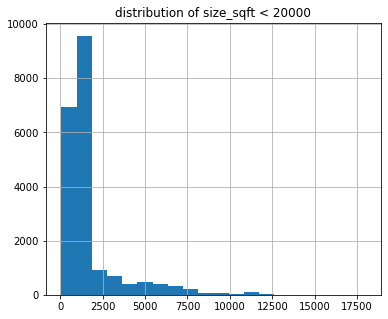

In [8]:
data_train[data_train['size_sqft']<20000]['size_sqft'].hist(bins=20, figsize=(6,5))
plt.title('distribution of size_sqft < 20000')
plt.show()


* Then we turn to these extremely small size_sqft values, if size_sqft value is smaller than 1/10 of middle value of attribute description, we consider this point as outlier and multiply its size_sqft value by 10.

In [12]:
uni_property_name = data_train['property_name'].unique()
uni_property_name

array(['866 yishun street 81', 'hdb-serangoon estate', 'meyerhouse', ...,
       'signature park', 'raya garden', '241 yishun ring road'],
      dtype=object)

In [17]:
min_extre_list = []
max_extre_list = []

for uni_name in uni_property_name:
    data_desc = data_train[data_train['property_name']==uni_name]['size_sqft'].describe()
    mid_dt = data_desc['50%']    
    min_dt = data_desc['min']
    max_dt = data_desc['max']

    # based on assumption that size_sqft properties with same property_name cannot range outside [mid/10, mid*10]
    # and data input may confuse size_sqft and size in square meters
    if min_dt < mid_dt / 10:
        min_extre_list += data_train[(data_train['size_sqft'] < mid_dt/10) & (data_train['property_name'] == uni_name)]['listing_id'].values.tolist()

    if max_dt > mid_dt * 10:
        max_extre_list += data_train[(data_train['size_sqft'] > mid_dt*10) & (data_train['property_name'] == uni_name)]['listing_id'].values.tolist()
    
    
    prt_type = data_train[data_train['property_name']==uni_name]['property_type'].unique()
    for p_type in prt_type:
        prt_desc = data_train[(data_train['property_name']==uni_name) & (data_train['property_type']==p_type)]['size_sqft'].describe()
        mid_dt = data_desc['50%']    
        min_dt = data_desc['min']
        max_dt = data_desc['max']
        # based on assumption that size_sqft properties with same property_name and same property_type cannot range outside [mid/3, mid*3]
        # and assign value with similar size_sqft to this data point
        if min_dt < mid_dt / 5:
            data_train[(data_train['size_sqft'] < mid_dt/5) & (data_train['property_name'] == uni_name) & (data_train['property_type'] == p_type)] = mid_dt

        if max_dt > mid_dt * 5:
            data_train[(data_train['size_sqft'] > mid_dt*5) & (data_train['property_name'] == uni_name) & (data_train['property_type'] == p_type)] = mid_dt




In [18]:
data_train.loc[data_train['listing_id'].isin(min_extre_list)]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price


In [19]:
for lst_id in min_extre_list:
    data_train["size_sqft"] = np.where(data_train["listing_id"] == lst_id, data_train["size_sqft"] * 10, data_train["size_sqft"])


In [20]:
data_train.loc[data_train['listing_id'].isin(max_extre_list)]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price


In [21]:
for lst_id in max_extre_list:
    data_train["size_sqft"] = np.where(data_train["listing_id"] == lst_id, data_train["size_sqft"] / 10, data_train["size_sqft"])


## Preprocessing price attribute

* Now we turn to processing price attribute, as before, firstly we show its distribution and box plot to find possible outliers.

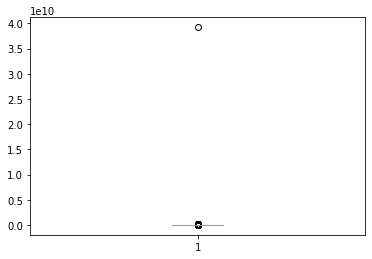

In [22]:
plt.boxplot(data_train['price'])
plt.show()


In [23]:
data_train[data_train['price']>1e8]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
5976,385586.0,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,232.0,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0.0,sengkang town centre,sengkang,3.924243e+10
6115,917822.0,5 bed house for sale in maplewoods,bukit timah road,maplewoods,bungalow,freehold,1997.0,5.0,5.0,7000.0,...,unspecified,"2, 3, 4, 5 br",697.0,https://www.99.co/singapore/condos-apartments/...,1.334360,103.784785,0.0,holland road,bukit timah,1.155000e+08
6396,494501.0,3 bed house for sale in oei tiong ham park,tanglin / holland (d10),oei tiong ham park,bungalow,freehold,1997.0,3.0,2.0,5000.0,...,unspecified,"3, 4, 5, 6, 8 br",NaN,https://www.99.co/singapore/houses/oei-tiong-h...,1.315580,103.792829,0.0,leedon park,bukit timah,1.050000e+08
19091,229401.0,10 bed house for sale in queen astrid park,queen astrid park,queen astrid park,Bungalow,999-year leasehold,1989.0,10.0,10.0,16000.0,...,unspecified,"5, 6, 7, 8, 10 br",NaN,https://www.99.co/singapore/houses/queen-astri...,1.317659,103.790578,0.0,leedon park,bukit timah,1.144500e+08


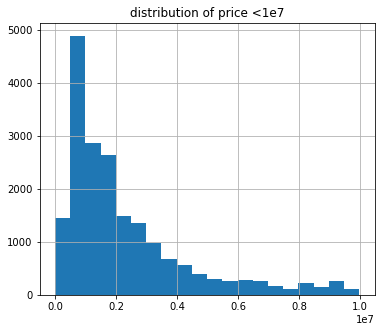

In [9]:
data_train[data_train['price']<1e7]['price'].hist(bins=20, figsize=(6,5))
plt.title('distribution of price <1e7')
plt.show()


* We would like to set a certain rule to recognize outliers, and in the following cells, we showed data records with 0 price and those with low price compared to other points in same property_name. 
    * With further observation, data points with 0 price are with built after 2021 and may not have sales record yet, here we drop these data points as they cannot provide useful price info. *concern: value 0 may appear in test data*
    * Identifying outliers in price:
        * When we want to identify outliers with the same method as we do to 'size_sqft', with reference to info on 99.co, we find that extremely large prices are possible. Also, if sale prices are largely different in one property_name, it is also reasonable with different sales date and sqft.
        * Next we try to focus on extremely low prices. Two point are less than 1/10 of their middle price in same property_name and they seem normal compared with 25% value.

In [25]:
data_train[data_train['price']==0]


,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
49,478899.0,3 bed condo for sale in uptown @ farrer,2 perumal road,uptown @ farrer,condo,99-year leasehold,2021.0,3.0,3.0,1292.0,...,unspecified,"studio, 2, 3, 4, 5 br",116.0,https://www.99.co/singapore/condos-apartments/...,1.312994,103.855616,0.0,lavender,kallang,0.0
289,224728.0,5 bed condo for sale in normanton park,49 normanton park,normanton park,condo,99-year leasehold,2023.0,5.0,4.0,1798.0,...,unspecified,"studio, 1, 2, 3, 4, 5 br",1862.0,https://www.99.co/singapore/condos-apartments/...,1.287158,103.792138,0.0,kent ridge,queenstown,0.0
388,483663.0,2 bed condo for sale in royalgreen,2 anamalai avenue,royalgreen,condo,freehold,2021.0,2.0,2.0,861.0,...,unspecified,"2, 3, 4, 5 br",285.0,https://www.99.co/singapore/condos-apartments/...,1.330403,103.794939,0.0,holland road,bukit timah,0.0
413,927196.0,2 bed condo for sale in uptown @ farrer,2 perumal road,uptown @ farrer,condo,99-year leasehold,2021.0,2.0,2.0,538.0,...,unspecified,"studio, 2, 3, 4, 5 br",116.0,https://www.99.co/singapore/condos-apartments/...,1.312994,103.855616,0.0,lavender,kallang,0.0
467,663178.0,4 bed condo for sale in the woodleigh residenc...,19 bidadari park drive,the woodleigh residences / the woodleigh mall,condo,99-year leasehold,2024.0,4.0,NaN,1475.0,...,unspecified,"1, 2, 3, 4 br",667.0,https://www.99.co/singapore/condos-apartments/...,1.338693,103.871750,0.0,bidadari,toa payoh,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19003,322693.0,3 bed condo for sale in the antares,19 mattar road,the antares,condo,99-year leasehold,2022.0,3.0,2.0,1023.0,...,unspecified,"1, 2, 3, 4 br",265.0,https://www.99.co/singapore/condos-apartments/...,1.325521,103.883276,0.0,macpherson,geylang,0.0
19407,382008.0,3 bed condo for sale in midwood,8 hillview rise,midwood,condo,99-year leasehold,2024.0,3.0,3.0,990.0,...,unspecified,"1, 2, 3, 4 br",564.0,https://www.99.co/singapore/condos-apartments/...,1.363469,103.763730,0.0,hillview,bukit batok,0.0
19487,539717.0,3 bed condo for sale in one meyer,1 meyer place,one meyer,condo,freehold,2023.0,3.0,2.0,915.0,...,unspecified,"1, 2, 3, 5 br",65.0,https://www.99.co/singapore/condos-apartments/...,1.298256,103.886232,0.0,mountbatten,marine parade,0.0
19582,256535.0,3 bed condo for sale in midwood,8 hillview rise,midwood,condo,99-year leasehold,2024.0,3.0,2.0,904.0,...,unspecified,"1, 2, 3, 4 br",564.0,https://www.99.co/singapore/condos-apartments/...,1.363469,103.763730,0.0,hillview,bukit batok,0.0


In [26]:
data_train = data_train.drop(data_train[data_train['price']==0].index)


* explore whether there are outliers considering price

In [15]:
data_train['price'].describe()

count    2.025400e+04
mean     3.254806e+06
std      2.819234e+07
min      0.000000e+00
25%      8.190000e+05
50%      1.679800e+06
75%      3.237150e+06
max      3.924243e+09
Name: price, dtype: float64

In [27]:
extre_list = []
for uni_name in uni_property_name:
    mid_dt = data_train[data_train['property_name']==uni_name]['price'].describe()['50%']    
    min_dt = data_train[data_train['property_name']==uni_name]['price'].describe()['min']
    max_dt = data_train[data_train['property_name']==uni_name]['price'].describe()['max']

    if min_dt <= mid_dt / 10:
        extre_list += data_train[(data_train['price'] < mid_dt/10) & (data_train['property_name'] == uni_name)]['listing_id'].values.tolist()
    if max_dt >= mid_dt * 10:
        extre_list += data_train[(data_train['price'] > mid_dt*10) & (data_train['property_name'] == uni_name)]['listing_id'].values.tolist()


In [28]:
extre_list

[122873.0, 891247.0, 385586.0, 155060.0]

In [29]:
data_train.loc[data_train['listing_id'].isin(extre_list)]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
663,122873.0,3 bed condo for sale in midtown modern,18 tan quee lan street,midtown modern,condo,99-year leasehold,2024.0,3.0,2.0,1066.0,...,unspecified,"studio, 1, 2, 3, 4, 5, 6 br",558.0,https://www.99.co/singapore/condos-apartments/...,1.298416,103.857178,0.0,bugis,downtown core,3.088050e+07
5976,385586.0,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,232.0,...,unspecified,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0.0,sengkang town centre,sengkang,3.924243e+10
10717,155060.0,2 bed condo for sale in maplewoods,993 bukit timah road,maplewoods,condo,freehold,1997.0,2.0,2.0,915.0,...,fully,"2, 3, 4, 5 br",697.0,https://www.99.co/singapore/condos-apartments/...,1.334360,103.784785,0.0,holland road,bukit timah,1.995000e+06
19587,891247.0,4 bed ec for sale in north gaia,41 yishun close,north gaia,executive condo,99-year leasehold,2027.0,4.0,3.0,1313.0,...,partial,"2, 3, 4, 5 br",616.0,https://www.99.co/singapore/condos-apartments/...,1.434928,103.845282,0.0,yishun east,yishun,1.688400e+07


In [30]:
for i in extre_list:
    prt_name = data_train[data_train['listing_id']==i]['property_name'].values[0]
    print(i, 'price:', data_train[data_train['listing_id']==i]['price'].values[0], 'prt_name:', prt_name)
    print(data_train[data_train['property_name'] == prt_name]['price'].describe())

122873.0 price: 30880500.0 prt_name: midtown modern
count    1.360000e+02
mean     4.384571e+06
std      4.442821e+06
min      1.333500e+06
25%      2.218125e+06
50%      2.736300e+06
75%      4.134900e+06
max      3.088050e+07
Name: price, dtype: float64
891247.0 price: 16884000.0 prt_name: north gaia
count    2.540000e+02
mean     1.491926e+06
std      1.016056e+06
min      9.450000e+05
25%      1.197000e+06
50%      1.290250e+06
75%      1.688400e+06
max      1.688400e+07
Name: price, dtype: float64
385586.0 price: 39242425300.0 prt_name: compassvale plains
count    4.000000e+00
mean     9.811083e+09
std      1.962089e+10
min      5.754000e+05
25%      6.390750e+05
50%      6.655500e+05
75%      9.811109e+09
max      3.924243e+10
Name: price, dtype: float64
155060.0 price: 1995000.0 prt_name: maplewoods
count    2.000000e+00
mean     5.874750e+07
std      8.026016e+07
min      1.995000e+06
25%      3.037125e+07
50%      5.874750e+07
75%      8.712375e+07
max      1.155000e+08
Name: 

* explore if there is any outlier when considering price per sqft

In [10]:
data_train['price_sqft'] = data_train['price'] / data_train['size_sqft']

In [32]:
data_train.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price,price_sqft
0,122881.0,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115.0,...,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0.0,yishun south,yishun,514500.0,461.434978
1,259374.0,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575.0,...,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0.0,serangoon north,serangoon,995400.0,632.000000
2,665422.0,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070.0,...,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0.0,mountbatten,marine parade,8485000.0,2763.843648
3,857699.0,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958.0,...,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0.0,farrer court,bukit timah,2626000.0,2741.127349
4,216061.0,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732.0,...,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0.0,anson,downtown core,1764000.0,2409.836066


In [13]:
min_price_extre_list = []
max_price_extre_list = []

for uni_name in uni_property_name:
    price_describe = data_train[data_train['property_name']==uni_name]['price_sqft'].describe()
    mid_dt = price_describe['50%']
    min_dt = price_describe['min']
    max_dt = price_describe['max']
    if min_dt < mid_dt / 10:
        min_price_extre_list += data_train[(data_train['price_sqft'] < mid_dt/10) & (data_train['property_name'] == uni_name)]['listing_id'].values.tolist()

    if max_dt > mid_dt * 10:
        max_price_extre_list += data_train[(data_train['price_sqft'] > mid_dt*10) & (data_train['property_name'] == uni_name)]['listing_id'].values.tolist()


In [34]:
data_train.loc[data_train['listing_id'].isin(min_price_extre_list)]


,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price,price_sqft
18052,842529.0,6 bed house for sale in the glencaird residences,dalvey road,the glencaird residences,bungalow,freehold,2000.0,6.0,6.0,11000.0,...,"3, 4, 5, 6 br",12.0,https://www.99.co/singapore/houses/the-glencai...,1.315477,103.819725,0.0,nassim,tanglin,34650000.0,3150.0


In [35]:
data_train[(data_train['property_name'] == 'the glencaird residences')]

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price,price_sqft
5812,824358.0,5 bed house for sale in the glencaird residences,dalvey road,the glencaird residences,bungalow,freehold,2000.0,5.0,4.0,3000.0,...,"3, 4, 5, 6 br",12.0,https://www.99.co/singapore/houses/the-glencai...,1.315477,103.819725,0.0,nassim,tanglin,99750000.0,33250.0
15431,968693.0,4 bed house for sale in the glencaird residences,dalvey road,the glencaird residences,good class bungalow,freehold,2000.0,4.0,4.0,3000.0,...,"3, 4, 5, 6 br",12.0,https://www.99.co/singapore/houses/the-glencai...,1.315477,103.819725,0.0,nassim,tanglin,99750000.0,33250.0
18052,842529.0,6 bed house for sale in the glencaird residences,dalvey road,the glencaird residences,bungalow,freehold,2000.0,6.0,6.0,11000.0,...,"3, 4, 5, 6 br",12.0,https://www.99.co/singapore/houses/the-glencai...,1.315477,103.819725,0.0,nassim,tanglin,34650000.0,3150.0
18972,622818.0,4 bed house for sale in the glencaird residences,dalvey road,the glencaird residences,bungalow,freehold,2000.0,4.0,4.0,3000.0,...,"3, 4, 5, 6 br",12.0,https://www.99.co/singapore/houses/the-glencai...,1.315477,103.819725,0.0,nassim,tanglin,99750000.0,33250.0


In [36]:
data_train.loc[data_train['listing_id'].isin(max_price_extre_list)]



,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price,price_sqft
663,122873.0,3 bed condo for sale in midtown modern,18 tan quee lan street,midtown modern,condo,99-year leasehold,2024.0,3.0,2.0,1066.0,...,"studio, 1, 2, 3, 4, 5, 6 br",558.0,https://www.99.co/singapore/condos-apartments/...,1.298416,103.857178,0.0,bugis,downtown core,3.088050e+07,2.896857e+04
5976,385586.0,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,232.0,...,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0.0,sengkang town centre,sengkang,3.924243e+10,1.691484e+08
19587,891247.0,4 bed ec for sale in north gaia,41 yishun close,north gaia,executive condo,99-year leasehold,2027.0,4.0,3.0,1313.0,...,"2, 3, 4, 5 br",616.0,https://www.99.co/singapore/condos-apartments/...,1.434928,103.845282,0.0,yishun east,yishun,1.688400e+07,1.285910e+04


In [37]:
for i in max_price_extre_list:
    prt_name = data_train[data_train['listing_id']==i]['property_name'].values[0]
    print(i, 'price:', data_train[data_train['listing_id']==i]['price'].values[0], 'prt_name:', prt_name)
    print(data_train[data_train['property_name'] == prt_name]['price'].describe())

122873.0 price: 30880500.0 prt_name: midtown modern
count    1.360000e+02
mean     4.384571e+06
std      4.442821e+06
min      1.333500e+06
25%      2.218125e+06
50%      2.736300e+06
75%      4.134900e+06
max      3.088050e+07
Name: price, dtype: float64
891247.0 price: 16884000.0 prt_name: north gaia
count    2.540000e+02
mean     1.491926e+06
std      1.016056e+06
min      9.450000e+05
25%      1.197000e+06
50%      1.290250e+06
75%      1.688400e+06
max      1.688400e+07
Name: price, dtype: float64
385586.0 price: 39242425300.0 prt_name: compassvale plains
count    4.000000e+00
mean     9.811083e+09
std      1.962089e+10
min      5.754000e+05
25%      6.390750e+05
50%      6.655500e+05
75%      9.811109e+09
max      3.924243e+10
Name: price, dtype: float64


In [38]:
data_train.loc[data_train['listing_id'].isin(max_price_extre_list)]


,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price,price_sqft
663,122873.0,3 bed condo for sale in midtown modern,18 tan quee lan street,midtown modern,condo,99-year leasehold,2024.0,3.0,2.0,1066.0,...,"studio, 1, 2, 3, 4, 5, 6 br",558.0,https://www.99.co/singapore/condos-apartments/...,1.298416,103.857178,0.0,bugis,downtown core,3.088050e+07,2.896857e+04
5976,385586.0,hdb flat for sale in 238 compassvale walk,hougang / punggol / sengkang (d19),compassvale plains,hdb 4 rooms,99-year leasehold,1999.0,1.0,10.0,232.0,...,"1, 3, 4 br",NaN,https://www.99.co/singapore/hdb/compassvale-pl...,1.390556,103.898921,0.0,sengkang town centre,sengkang,3.924243e+10,1.691484e+08
19587,891247.0,4 bed ec for sale in north gaia,41 yishun close,north gaia,executive condo,99-year leasehold,2027.0,4.0,3.0,1313.0,...,"2, 3, 4, 5 br",616.0,https://www.99.co/singapore/condos-apartments/...,1.434928,103.845282,0.0,yishun east,yishun,1.688400e+07,1.285910e+04


In [14]:
for i in max_price_extre_list:
    idx = data_train[data_train['listing_id']==i].index
    property_name = data_train[data_train['listing_id']==i]['property_name'].values[0]
    price = data_train[data_train['listing_id']==i]['price'].values[0]
    price_describe = data_train[data_train['property_name']==property_name]['price'].describe()
    quarter3_dt = price_describe['75%']

    while price > quarter3_dt:
        data_train.loc[idx, ['price']] = price/10
        price /= 10



* try to group by property_type and find outliers, get no outlier

In [39]:
uni_property_type = data_train['property_type'].unique()
uni_property_type

array(['hdb 4 rooms', 'hdb', 'condo', 'Condo', 'bungalow', 'Hdb',
       'terraced house', 'Hdb Executive', 'apartment',
       'Semi-Detached House', 'Apartment', 'Hdb 4 Rooms',
       'semi-detached house', 'hdb 3 rooms', 'executive condo',
       'corner terrace', 'hdb executive', 'Hdb 3 Rooms', 'Hdb 5 Rooms',
       'hdb 5 rooms', 'landed', 'hdb 2 rooms', 'Executive Condo',
       'Bungalow', 'Corner Terrace', 'Terraced House', 'cluster house',
       'Cluster House', 3000.0, 'townhouse', 1830.0, 'Hdb 2 Rooms',
       1356.0, 785.0, 1121.0, 3293.5, 5059.0, 2550.0,
       'conservation house', 'land only', 1658.0, 'walk-up', 581.0,
       1216.0, 1129.0, 1539.0, 796.0, 5651.0, 1001.0, 1109.0, 882.0,
       4402.0, 'Townhouse', 2723.0, 'Conservation House', 861.5,
       'good class bungalow', 1184.0, 1280.5, 952.5, 3574.0, 1292.0,
       1076.0, 732.0, 985.0, 1141.0, 710.0, 'Landed', 1227.0, 1044.0,
       1195.0, 14250.0, 2500.0, 1604.0, 4058.0, 947.0, 909.0, 1528.0,
       1000.0,

In [40]:
min_price_extre_list1 = []
max_price_extre_list1 = []

for uni_type in uni_property_type:
    price_describe = data_train[data_train['property_name']==uni_type]['price_sqft']
    mid_dt = price_describe.describe()['50%']
    min_dt = price_describe.describe()['min']
    max_dt = price_describe.describe()['max']
    if min_dt < mid_dt / 10:
        min_price_extre_list1 += data_train[(data_train['price_sqft'] < mid_dt/10) & (data_train['property_type'] == uni_type)]['listing_id'].values.tolist()

    if max_dt > mid_dt * 10:
        max_price_extre_list1 += data_train[(data_train['price_sqft'] > mid_dt*10) & (data_train['property_type'] == uni_type)]['listing_id'].values.tolist()



In [41]:
data_train.loc[data_train['listing_id'].isin(min_price_extre_list1)]



,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price,price_sqft


In [42]:
data_train.loc[data_train['listing_id'].isin(min_price_extre_list1)]



,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price,price_sqft


* drop these records?
* /* 10 or / 10
* 'assign value group by property_name & similar size_sqft'